In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import kaepora as kpora
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

## The Max-Light Composite

In [4]:
%matplotlib inline

In [5]:
# query_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase <= 1"]
query_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))"]

In [7]:
# composites_max, sn_arrays_max, boot_sn_arrays_max = query_db.main(len(query_max), query_max, boot=True, medmean=1, gini_balance = True, verbose=False, measure_vs = True)
composites_max, sn_arrays_max, boot_sn_arrays_max = kpora.make_composite(query_max, db_file = '../data/kaepora_v1.1.db', boot=True, medmean=1, gini_balance = True, verbose=False, measure_vs = True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8))
170 Total Spectra found
7 flagged spectra removed 163 spectra left
3 spectra of peculiar Ias removed 160 spectra left
146 spectra of SNe that have host reddening corrections
Arrays cleaned
146 spectra may have telluric contamination
98 total SNe
removed spectra of SNe with A_V > 2.0
Using 140 spectra of 95 SNe
Gini balancing...
Balanced after 26 iterations
Bootstrapping


AttributeError: 'list' object has no attribute 'flux'

Phase:  0.10522052397477366
dm15:  1.1064083944382115
Redshift:  0.0131869184831283
Morphology:  11.74856427660158


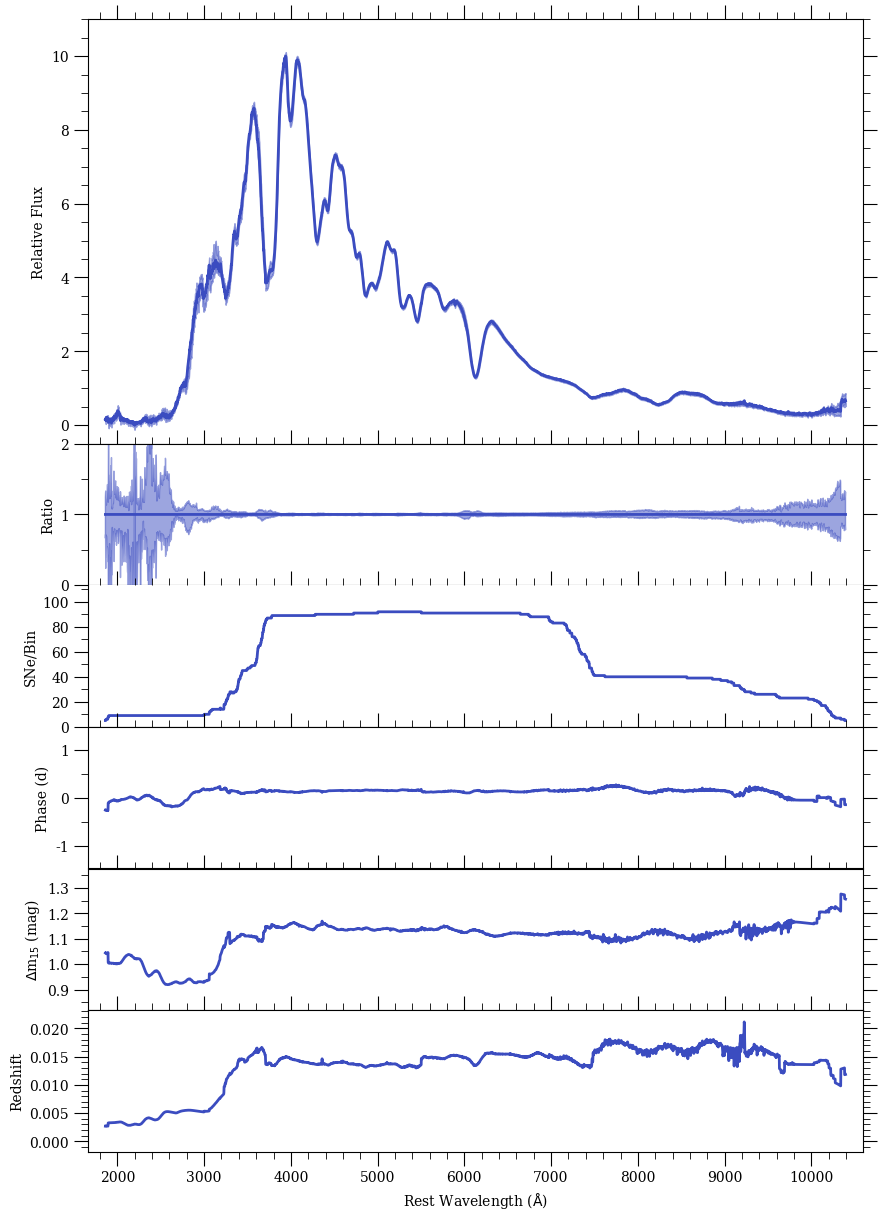

In [10]:
# query_db.set_min_num_spec(comps_host_max, 1)
# query_db.save_comps_to_files(composites_max, 'siebert_example_max_light')
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5, savename='main_composites_updated/maximum_light_all_dm15')
query_db.comparison_plot(composites_max, scale_type=False, min_num_show=5)
# query_db.comparison_plot(composites_max, scale_type=False, min_num_show=10, legend_labels = ['$-1 \leq$ phase $\leq 1$ (days)'])

In [11]:
query_strings_all = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10 and phase < -9",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -9 and phase < -8",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8 and phase < -7",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7 and phase < -6",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6 and phase < -5",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -5 and phase < -4",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4 and phase < -3",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -3 and phase < -2",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2 and phase < -1",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1 and phase < 0",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 0 and phase < 1",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 1 and phase < 2",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2 and phase < 3",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 3 and phase < 4",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 4 and phase < 5",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 5 and phase < 6",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 6 and phase < 7",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 7 and phase < 8",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 8 and phase < 9",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 9 and phase < 10",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 10 and phase < 11",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 11 and phase < 12",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 12 and phase < 13",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 13 and phase < 14",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 14 and phase < 15",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 15 and phase < 16",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 16 and phase < 17",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 17 and phase < 18",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 18 and phase < 19",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 19 and phase < 20",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 20 and phase < 21",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 21 and phase < 22",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 22 and phase < 23",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23 and phase < 24",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 24 and phase < 25",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 25 and phase < 26",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 26 and phase < 27",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 27 and phase < 28",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 28 and phase < 29",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29 and phase < 30",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 30 and phase < 32",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 32 and phase < 34",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34 and phase < 36",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 36 and phase < 38",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38 and phase < 40",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 40 and phase < 42",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 42 and phase < 44",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 44 and phase < 46",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 46 and phase < 49",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 49 and phase < 52",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 52 and phase < 55",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 55 and phase < 58",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 58 and phase < 61",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 61 and phase < 65",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 65 and phase < 70",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 70 and phase < 78",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 78 and phase < 88",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 88 and phase < 98",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 98 and phase < 125",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 125 and phase < 180",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 180"
                ]

In [12]:
#changeable phase bin size
query_strings = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10."]
max_phase = 16.
p1 = -10.
k = 2.
p2 = p1+k
while p1 < max_phase:
    query_strings.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f"% (p1,p2))
    p1 += k
    p2 += k
print query_strings

['SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -4.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -2.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 0.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 0.000000 and phase < 2.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phase < 4.000000', 'SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 4.000000 and phase < 6.000000', 'SELECT

In [14]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(query_strings, boot=False, medmean=1, gini_balance=True, verbose=False)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.
98 Total Spectra found
1 flagged spectra removed 97 spectra left
0 spectra of peculiar Ias removed 97 spectra left
85 spectra of SNe that have host reddening corrections
Arrays cleaned
85 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0
Using 83 spectra of 35 SNe
Gini balancing...
Balanced after 21 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000
124 Total Spectra found
2 flagged spectra removed 122 spectra left
3 spectra of peculiar Ias removed 119 spectra left
101 spectra of SNe that have host reddening corrections
Arrays cleaned
101 spectra may have telluric contamination
55 total SNe
removed spectra of SNe with A_V > 2.0
Using 98 spectra of 53 SNe
Gini balancing...
Balanced after 12 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Event

In [15]:
composites_med, sn_arrays_med, boot_sn_arrays_med = kpora.make_composite(query_strings, boot=False, medmean=2, verbose=False)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10.
98 Total Spectra found
1 flagged spectra removed 97 spectra left
0 spectra of peculiar Ias removed 97 spectra left
85 spectra of SNe that have host reddening corrections
Arrays cleaned
85 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0
Using 83 spectra of 35 SNe
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -8.000000
124 Total Spectra found
2 flagged spectra removed 122 spectra left
3 spectra of peculiar Ias removed 119 spectra left
101 spectra of SNe that have host reddening corrections
Arrays cleaned
101 spectra may have telluric contamination
55 total SNe
removed spectra of SNe with A_V > 2.0
Using 98 spectra of 53 SNe
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -8.000000 and phase < -6.000000
166 Total Spectra found
3 flagged spectra re

In [16]:
sn_arr = sn_arrays[0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))

0.27387739197916344
10656.236035835253
0.009687195941080124
28.272102024667632


In [24]:
def stacked_plot(composites, boot=True, name = '', savename=None):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Constant', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
#     fig.set_size_inches(10.5, 80.5, forward = True) #long plot
#     fig.set_size_inches(10.5, 7.5, forward = True)
    fig.set_size_inches(10, 15, forward = True) #paper plot
    plt.gca().axes.yaxis.set_ticklabels([])

    i = 0
    if boot:
        lw=3
    else:
        lw=3
    for comp in composites:
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
#         buff = 200*np.log10(phase+20)
        buff  = i
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.*comp.flux[comp.x1:comp.x2] - buff, color = '#3F5D7D', linewidth = lw)
        if boot:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2]- buff, comp.up_conf[comp.x1:comp.x2] - buff, alpha = 0.5)
        if phase < 0:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " $-$%2.1f" % (np.absolute(phase)), fontname='stixsans', horizontalalignment = 'right')
        else:
            plt.text(10850, comp.flux[comp.x2] - buff+ .1, " %+2.1f" % (phase), fontname='stixsans', horizontalalignment = 'right')
#         plt.title('All Phase Composite Spectra', fontdict = font1, fontsize = 40)
        i+=1
    plt.ylim([len(composites)*-1., 2.9])
    plt.xlim([3000, 11000])
#     majorLocator = MultipleLocator(1000)
#     majorFormatter = FormatStrFormatter('%i')
    minorLocator = MultipleLocator(200)
    plt.gca().axes.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.gca().axes.xaxis.set_major_formatter(majorFormatter)
#     plt.gca().axes.xaxis.set_minor_locator(minorLocator)
    labels=plt.gca().axes.get_xticks().tolist()
    new_labels = []
    for s in labels:
        new_labels.append(str(int(s)))
    labels = new_labels
    labels[0]=''
    labels[-1]=''
#     labels[1]=''
#     labels[-2]=''
    print labels
    plt.gca().set_xticklabels(labels)
#     plt.savefig('../../../Paper_Drafts/main_composites_updated/all_t_spec_eq_spaced_long.pdf', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('../../FLASH/t_spec_eq_spaced'+name+'.png', dpi = 400, bbox_inches = 'tight')
    if savename is not None:
        plt.savefig('../../../Paper_Drafts/'+ savename + '.pdf', dpi = 300, bbox_inches = 'tight')
        plt.savefig('../../../Paper_Drafts/plot_images/'+ savename.split('/')[1] + '.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

In [14]:
composites_all, sn_arrays_all, boot_sn_arrays_all = query_db.main(len(query_strings_all), query_strings_all, boot=True, medmean=1, gini_balance=True, verbose=False)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10
../data/kaepora_v1.db
98 Total Spectra found
1 flagged spectra removed 97 spectra left
0 spectra of peculiar Ias removed 97 spectra left
85 spectra of SNe with that have host reddening corrections
Arrays cleaned
8 spectra may have telluric contamination
36 total SNe
removed spectra of SNe with A_V > 2.0

Using 83 spectra of 35 SNe
Gini balancing...
Balanced after 21 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10 and phase < -9
../data/kaepora_v1.db
49 Total Spectra found
1 flagged spectra removed 48 spectra left
1 spectra of peculiar Ias removed 47 spectra left
43 spectra of SNe with that have host reddening corrections
Arrays cleaned
1 spectra may have telluric contamination
37 total SNe
removed spectra of SNe with A_V > 2.0

Using 42 spectra of 36 SNe
Gini balancing...
Ba

In [15]:
import composite
# query_db.set_min_num_spec(composites, 5)
query_db.set_min_num_spec(composites_all, 5)
# print len(composites), len(composites_all)
# print np.average(composites_all[16].phase_array[composites_all[16].x1:composites_all[16].x2])
# plt.plot(composites_all[16].wavelength, composites_all[16].flux)
# plt.show()

In [16]:
# sub_list_1 = composites_all[0:16]
# sub_list_2 = composites_all[16:33]
# sub_list_3 = composites_all[33:50]
# sub_list_4 = composites_all[50:57]
# sub_list_5 = composites_all[57:]
i = 5
sub_list_1 = composites_all[0:5]
sub_list_2 = composites_all[5:10]
sub_list_3 = composites_all[10:15]
sub_list_4 = composites_all[15:20]
sub_list_5 = composites_all[20:25]
sub_list_6 = composites_all[25:30]
sub_list_7 = composites_all[30:35]
sub_list_8 = composites_all[35:40]
sub_list_9 = composites_all[40:45]
sub_list_10 = composites_all[45:50]
sub_list_11 = composites_all[50:55]
sub_list_12 = composites_all[55:60]
sub_list_13 = composites_all[60:]

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


C:\Program Files\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'stixsans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


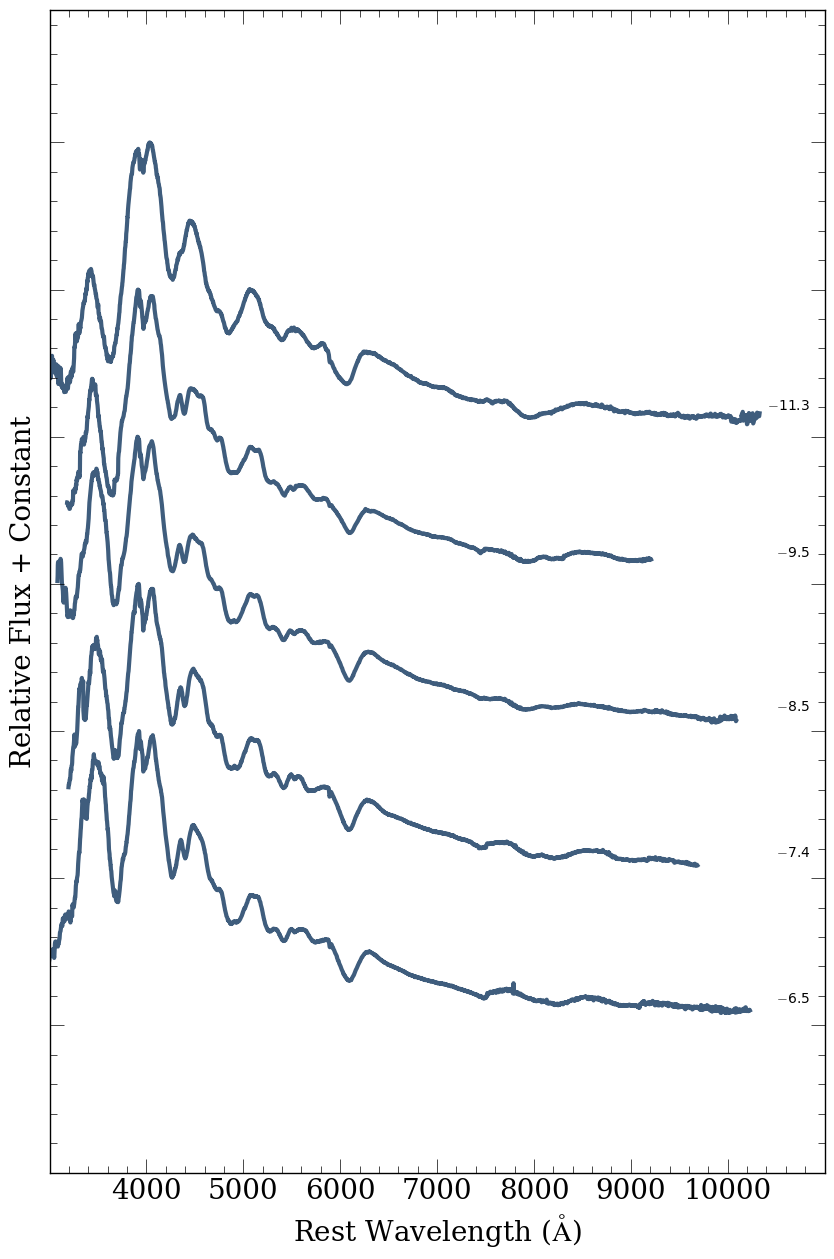

In [17]:
stacked_plot(sub_list_1, boot=False, name = '1')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


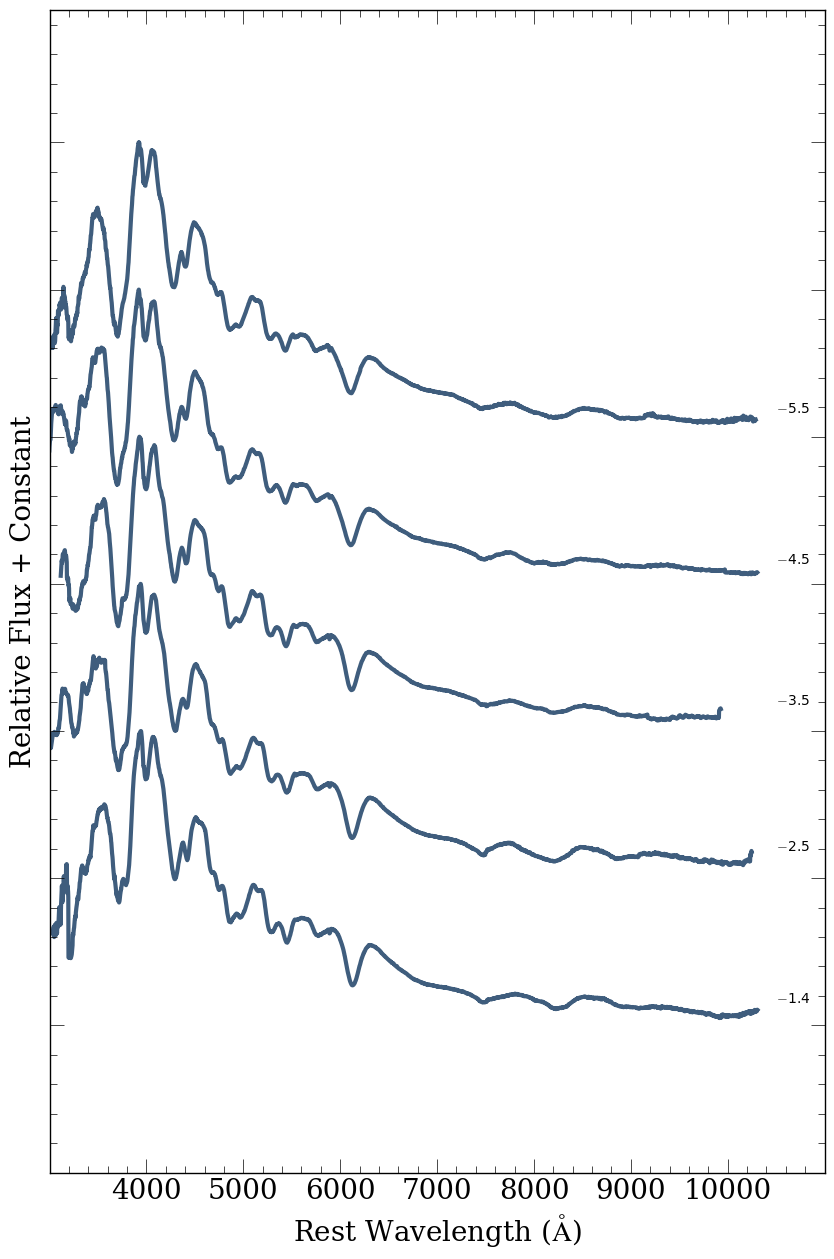

In [18]:
stacked_plot(sub_list_2, boot=False, name = '2')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


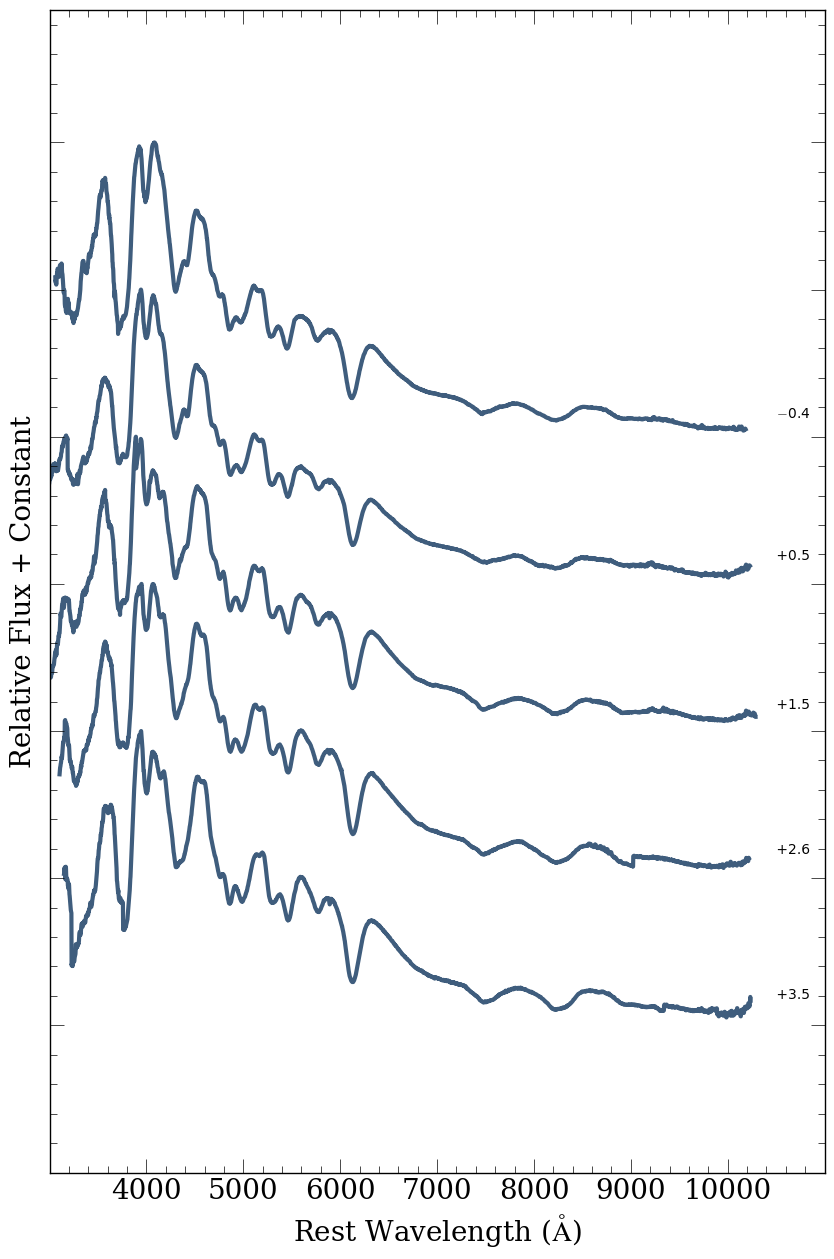

In [19]:
stacked_plot(sub_list_3, boot=False, name = '3')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


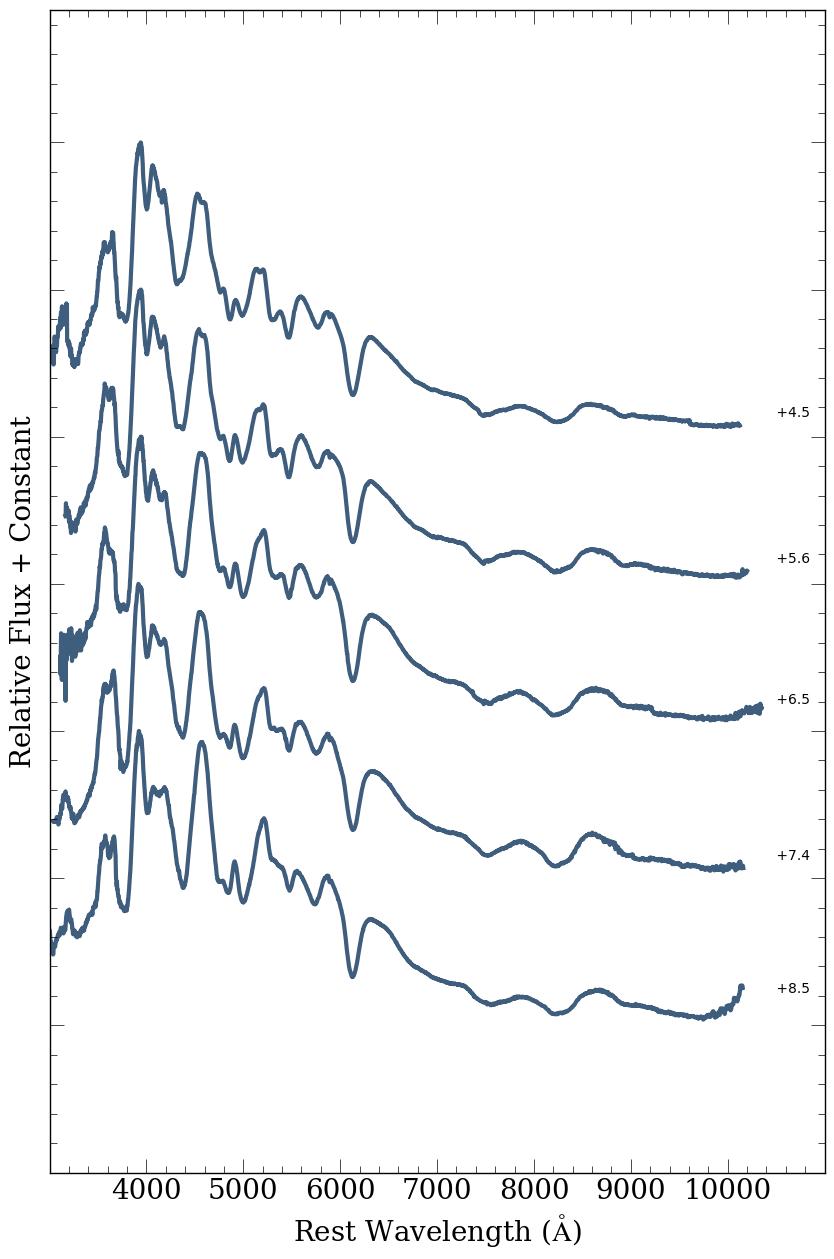

In [20]:
stacked_plot(sub_list_4, boot=False, name = '4')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


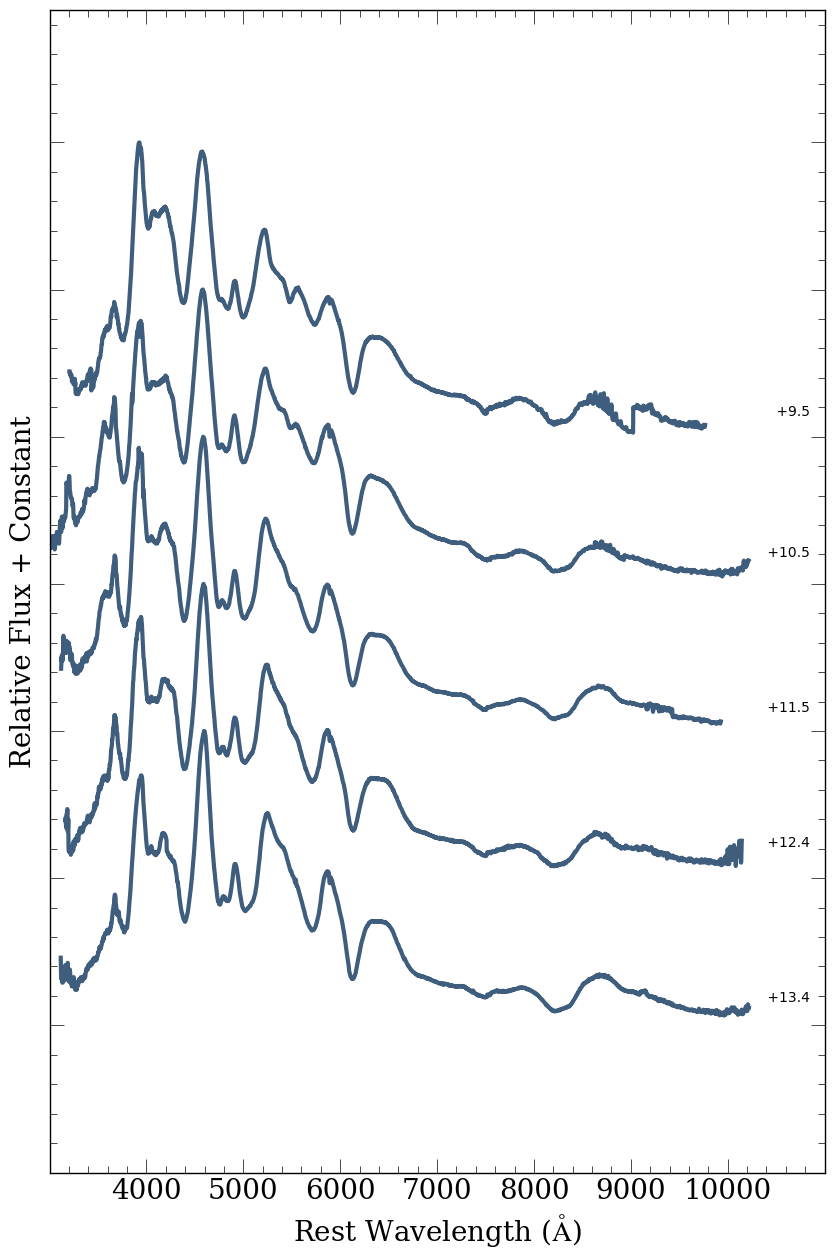

In [21]:
stacked_plot(sub_list_5, boot=False,name = '5')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


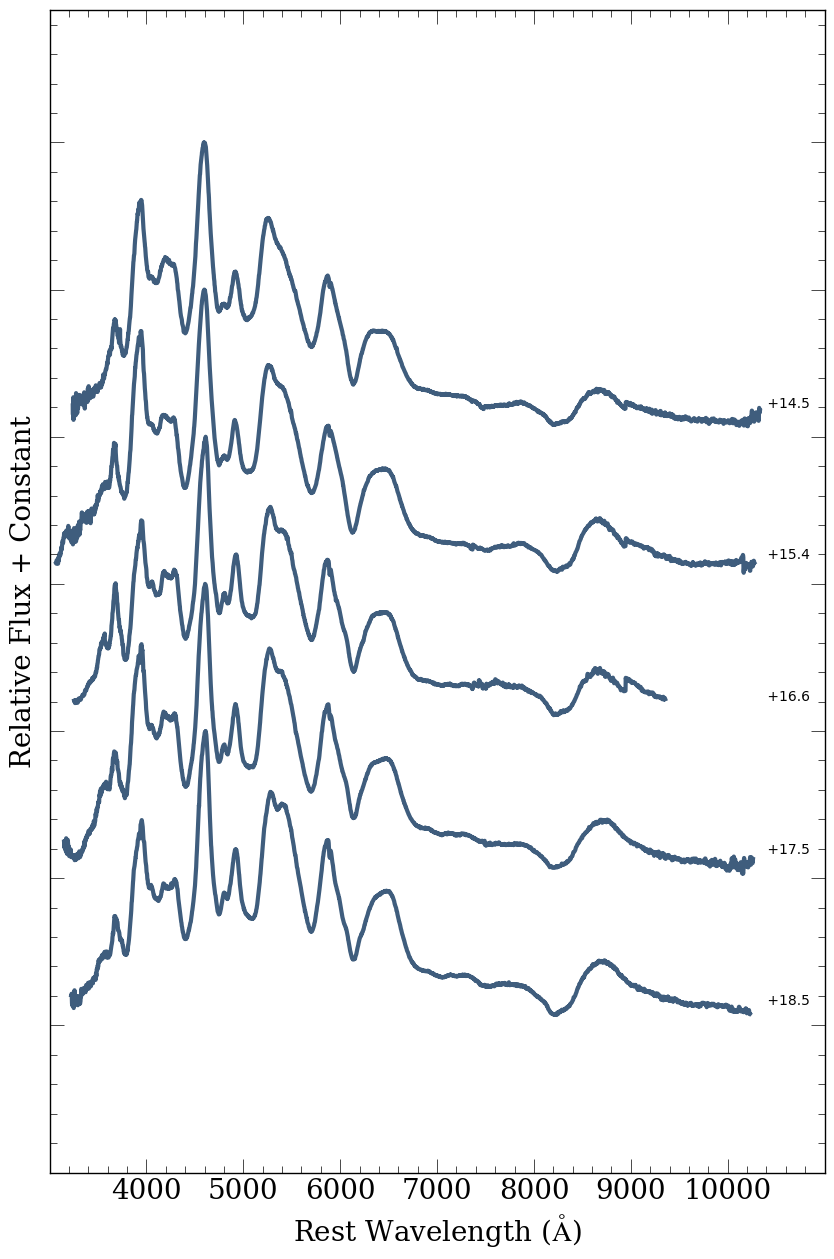

In [22]:
stacked_plot(sub_list_6, boot=False,name = '6')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


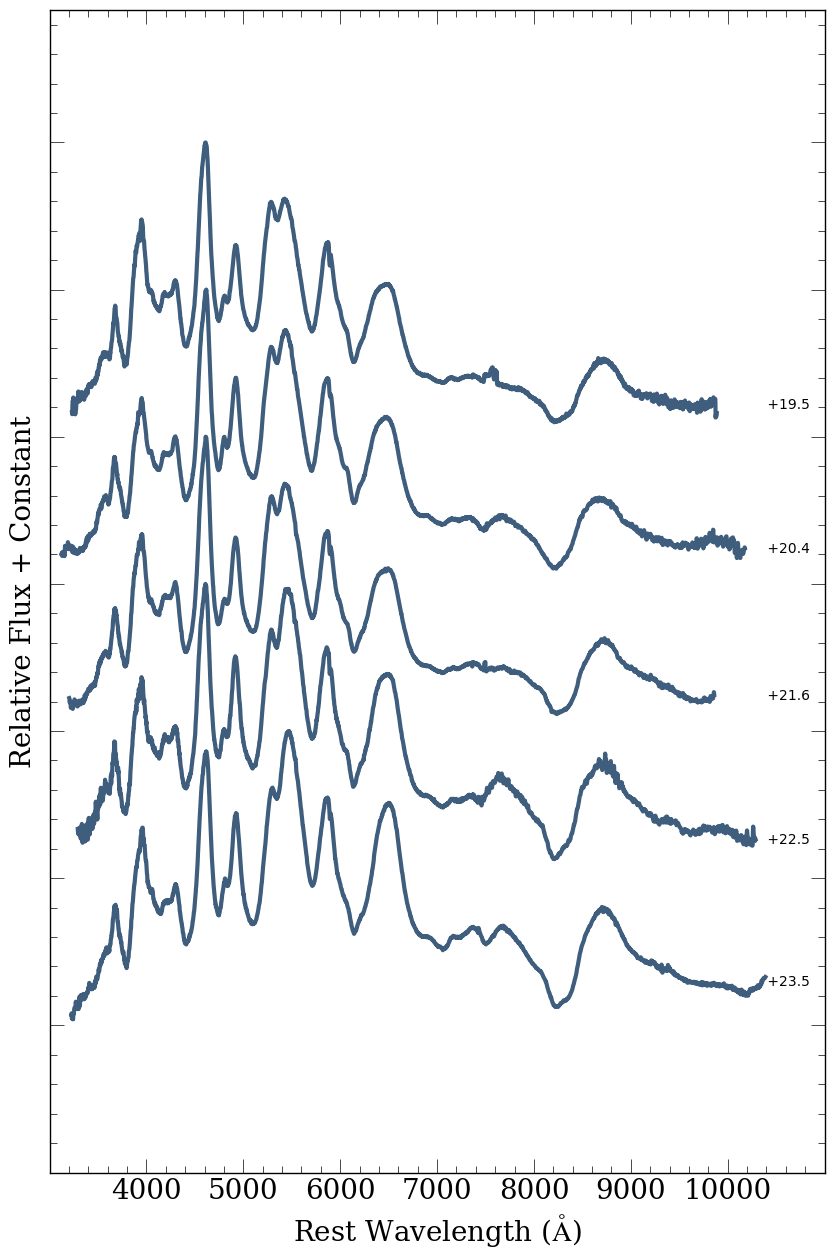

In [23]:
stacked_plot(sub_list_7, boot=False,name = '7')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


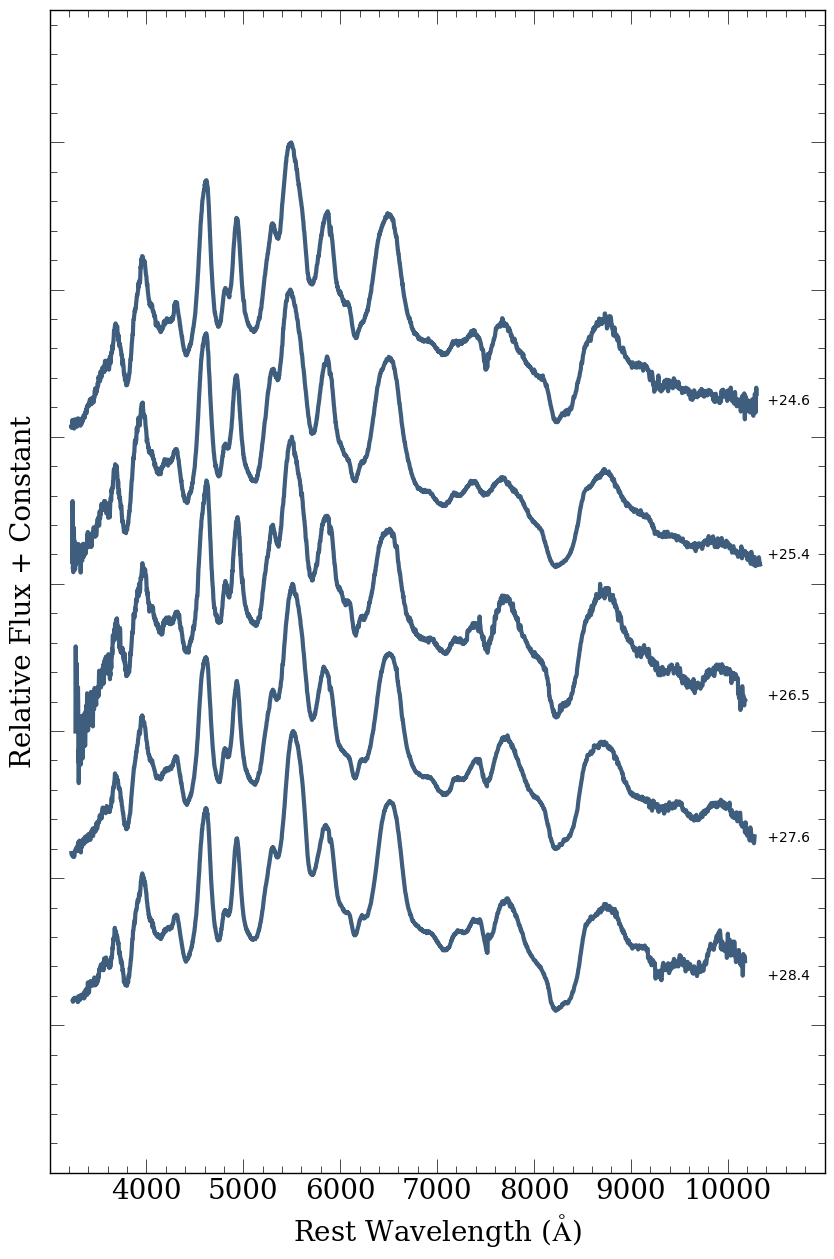

In [24]:
stacked_plot(sub_list_8, boot=False,name = '8')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


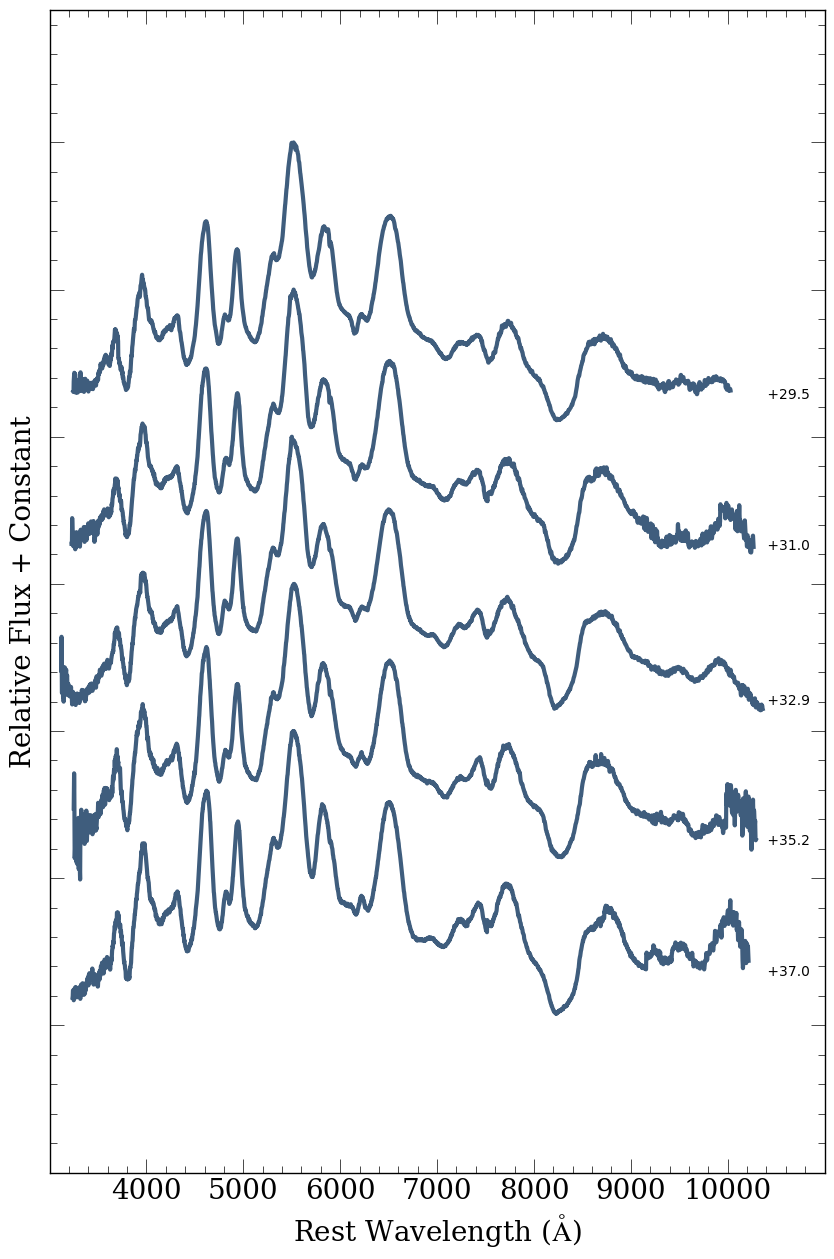

In [25]:
stacked_plot(sub_list_9, boot=False,name = '9')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


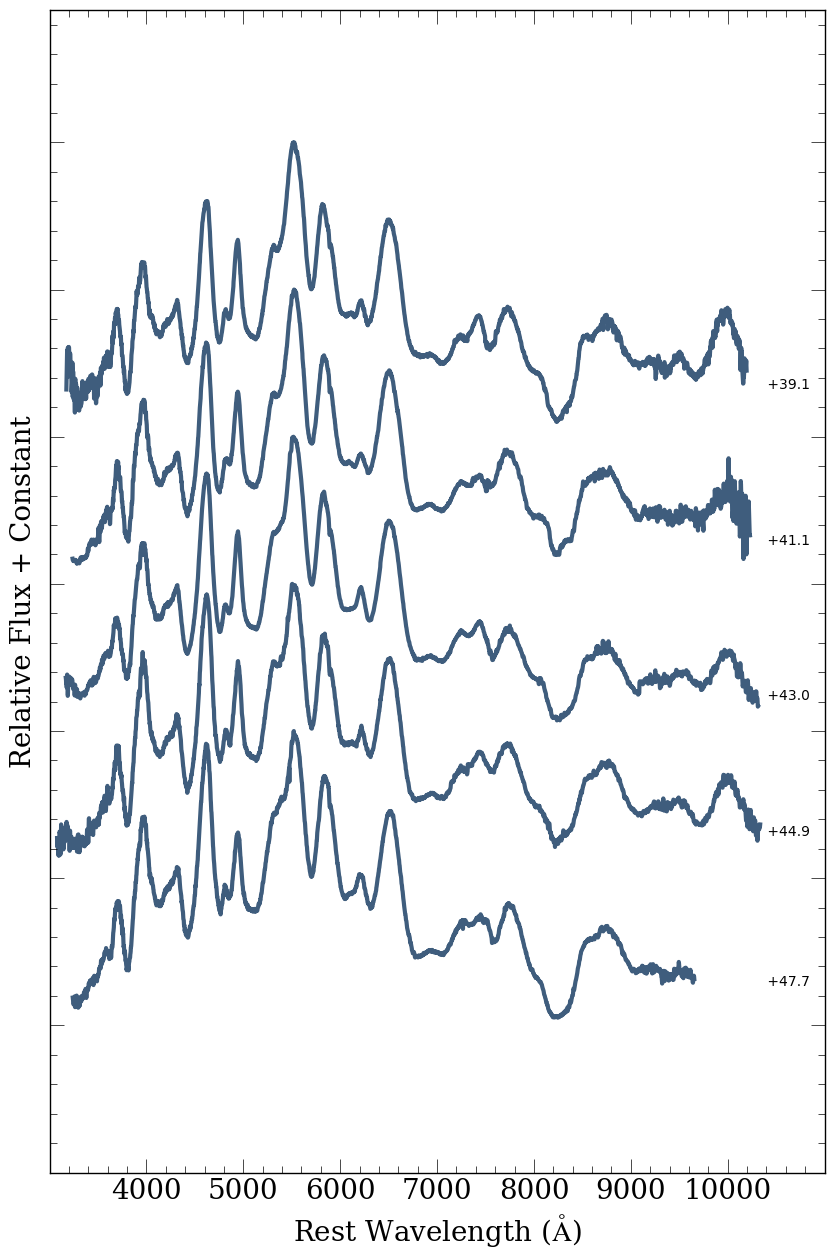

In [26]:
stacked_plot(sub_list_10, boot=False,name = '10')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


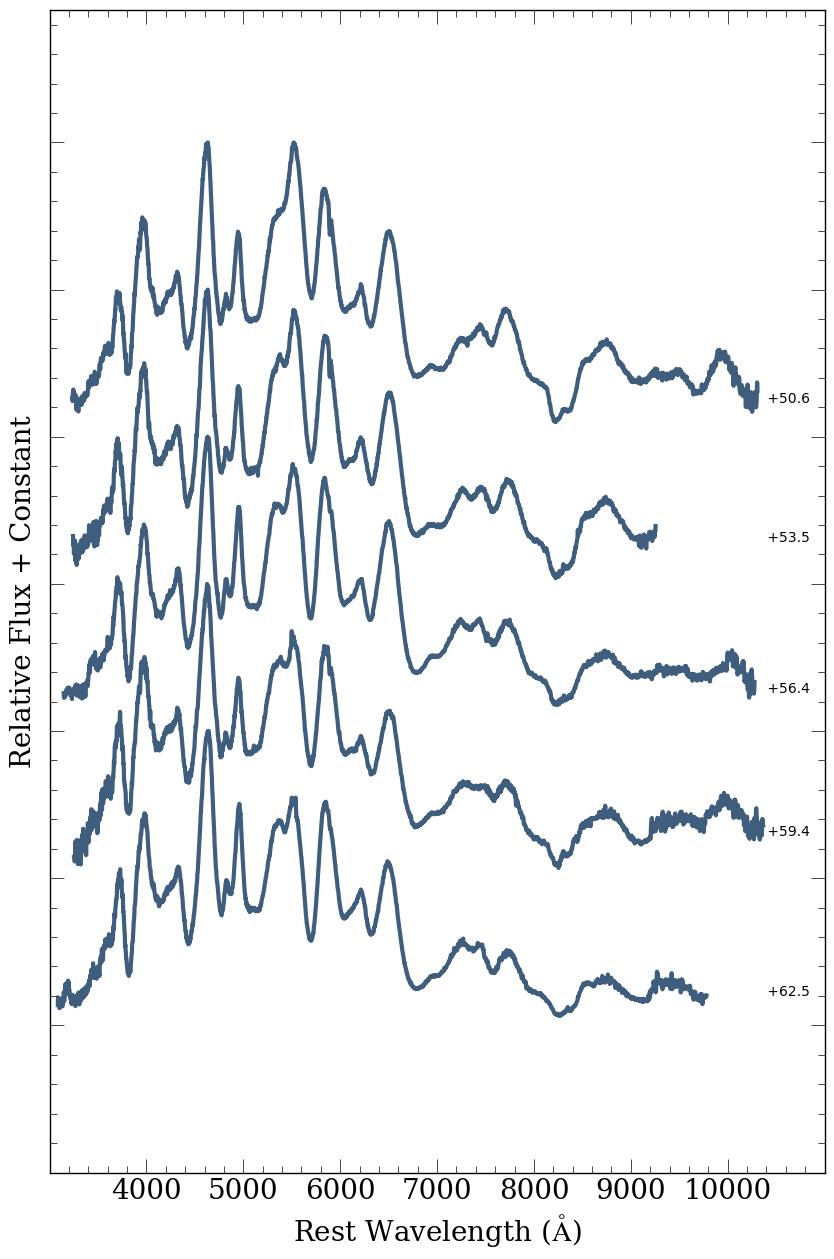

In [27]:
stacked_plot(sub_list_11, boot=False,name = '11')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


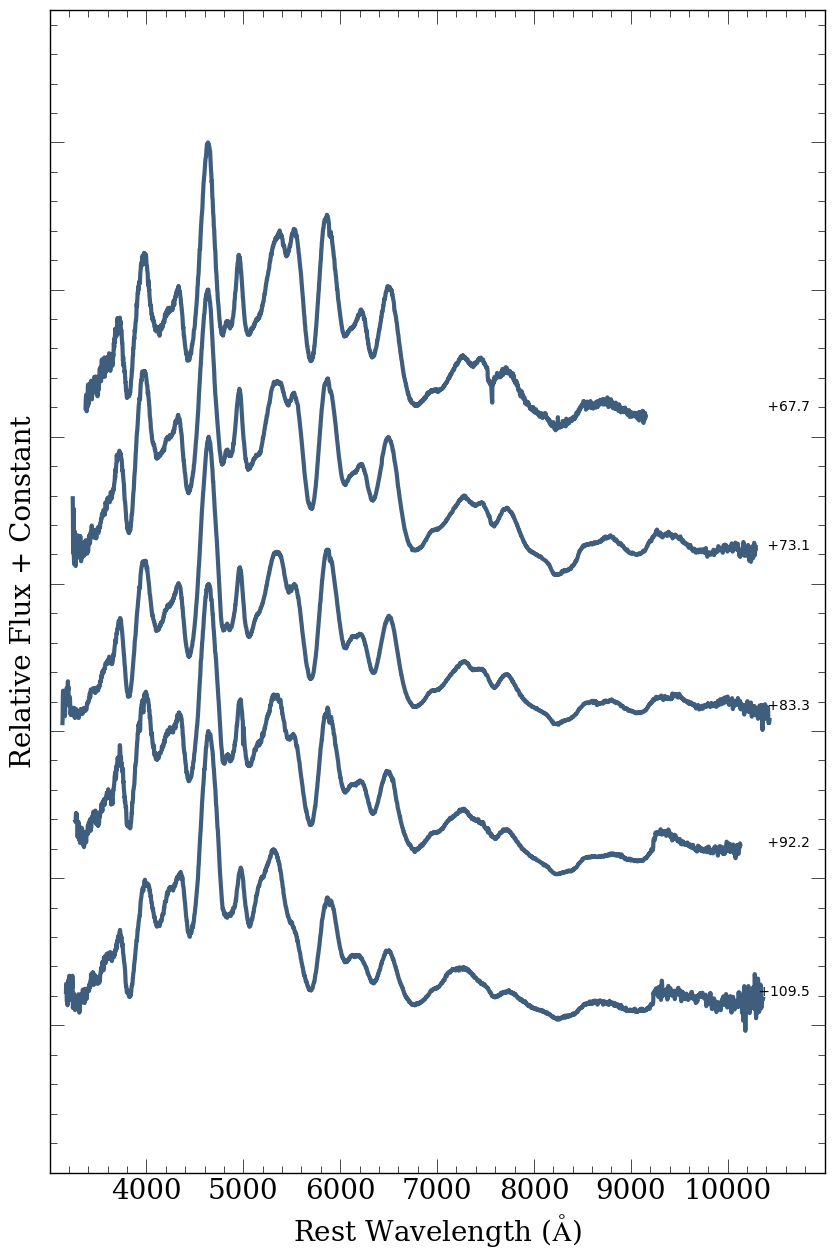

In [28]:
stacked_plot(sub_list_12, boot=False,name = '12')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


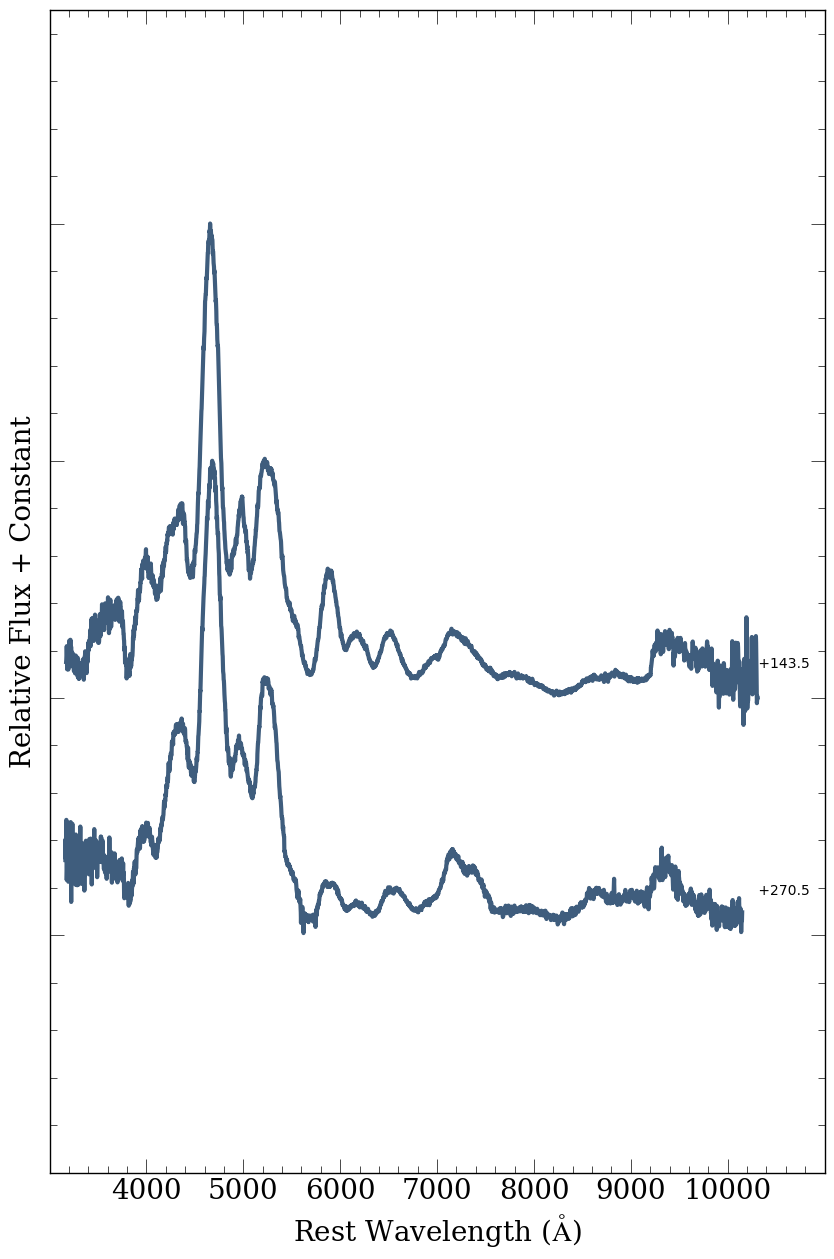

In [29]:
stacked_plot(sub_list_13, boot=False,name = '13')

-11.21 1.03 0.01
../data/S19_Composite_Spectra/siebert_phase_binned_N=35_Nspec=83_phase=m11.21_dm15=1.03_z=0.01.txt
-9.46 1.04 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_N=36_Nspec=42_phase=m9.46_dm15=1.04_z=0.012.txt
-8.47 1.05 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_N=44_Nspec=56_phase=m8.47_dm15=1.05_z=0.012.txt
-7.43 1.1 0.01
../data/S19_Composite_Spectra/siebert_phase_binned_N=45_Nspec=51_phase=m7.43_dm15=1.1_z=0.01.txt
-6.47 1.11 0.013
../data/S19_Composite_Spectra/siebert_phase_binned_N=51_Nspec=64_phase=m6.47_dm15=1.11_z=0.013.txt
-5.46 1.18 0.016
../data/S19_Composite_Spectra/siebert_phase_binned_N=58_Nspec=76_phase=m5.46_dm15=1.18_z=0.016.txt
-4.5 1.09 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_N=49_Nspec=62_phase=m4.5_dm15=1.09_z=0.012.txt
-3.45 1.15 0.013
../data/S19_Composite_Spectra/siebert_phase_binned_N=59_Nspec=70_phase=m3.45_dm15=1.15_z=0.013.txt
-2.48 1.22 0.013
../data/S19_Composite_Spectra/siebert_phase_binned_N=61_Nspec

C:\Program Files\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'stixsans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


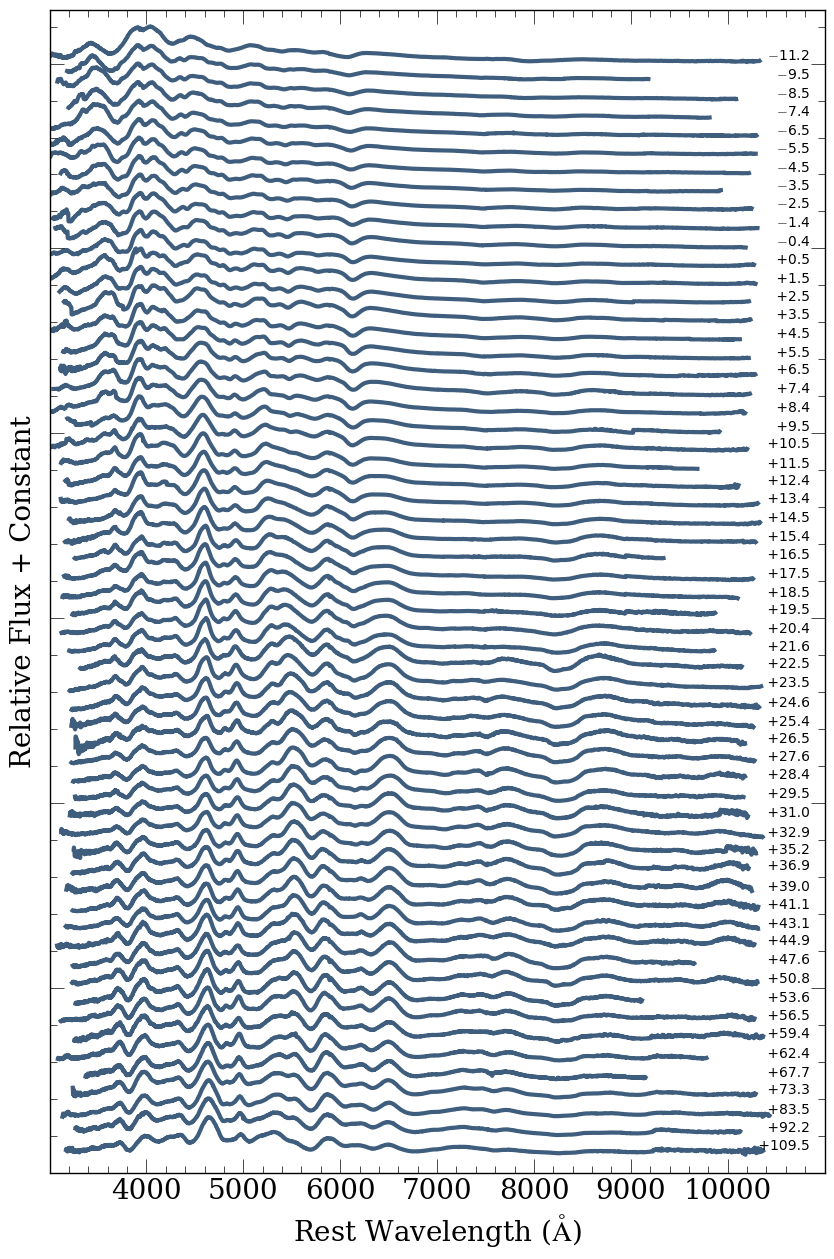

In [17]:
# stacked_plot(composites_all, boot=False, name = 'all', savename='main_composites_updated/all_t_spec_eq_spaced.pdf')
query_db.save_comps_to_files(composites_all, 'siebert_phase_binned')

['', '4000', '5000', '6000', '7000', '8000', '9000', '10000', '']


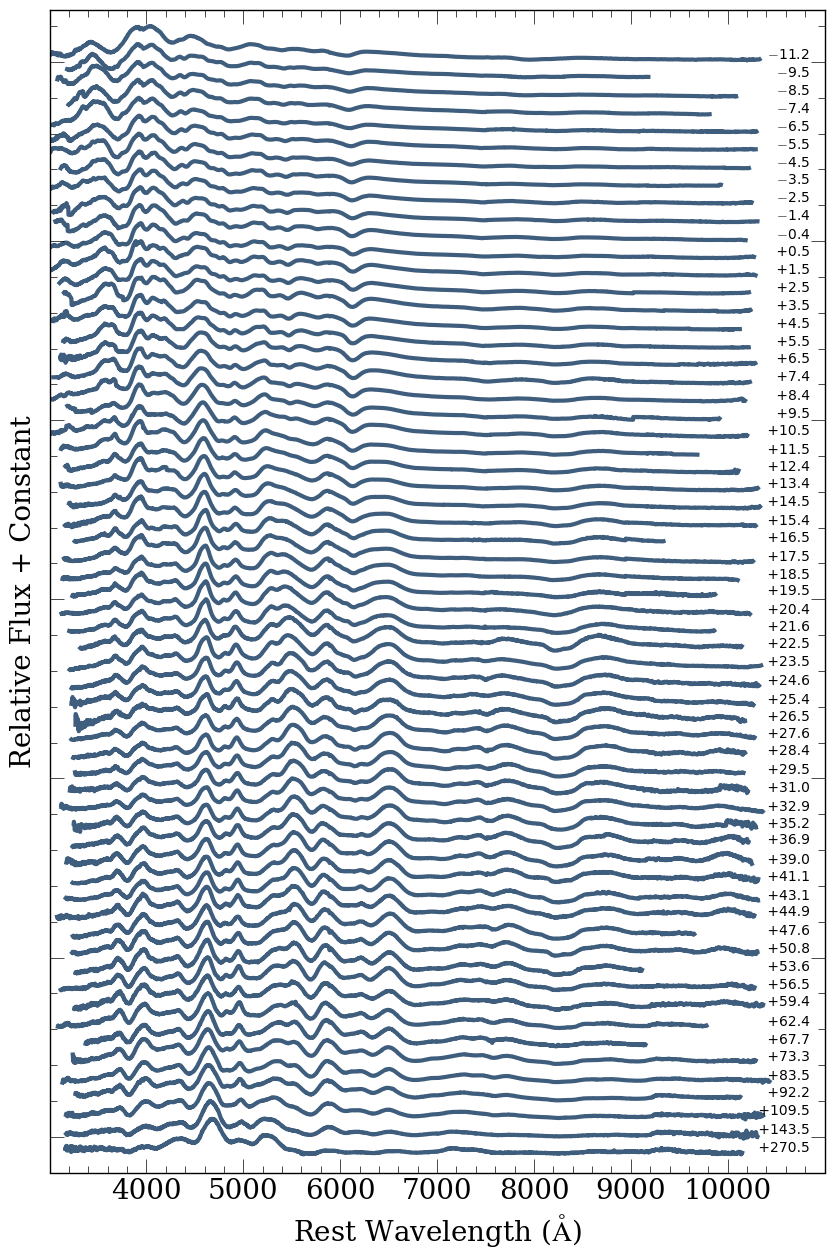

In [38]:
query_db.set_min_num_spec(composites_all, 5)
stacked_plot(composites_all[0:], boot=False, name = 'all', savename='main_composites_updated/all_t_spec_eq_spaced')

In [18]:
# query_db.plot_comp_and_all_spectra(composites[3],sn_arrays[3])

In [17]:
velocities = []
phases = []
dm15s = []
# weak_velocities = []
for comp in composites:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities.append(v)
    phases.append(p)
    dm15s.append(dm15)

In [18]:
velocities_med = []
phases_med = []
dm15s_med = []
# weak_velocities = []
for comp in composites_med:
# for comp in composites:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.average(comp.dm15_array[comp.x1:comp.x2]),2)
    v= sa.measure_velocity(comp.wavelength[comp.x1:comp.x2],comp.flux[comp.x1:comp.x2], 5900, 6300)[0]/1000.
#     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
#     weak_velocities.append(wv)
    velocities_med.append(v)
    phases_med.append(p)
    dm15s_med.append(dm15)

[1.02, 1.04, 1.1, 1.13, 1.18, 1.17, 1.13, 1.2, 1.15, 1.19, 1.13, 1.18, 1.11, 1.12]
[13.745801257721572, 12.466877315828722, 12.368705218656679, 11.58439197469063, 11.29076212006811, 10.997398333424474, 10.801970321149453, 10.801970321149453, 10.6066606057344, 10.801970321149453, 10.704300675253513, 10.801970321149453, 10.704300675253513, 10.704300675253513]


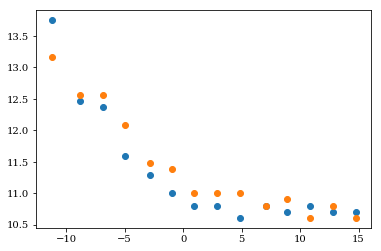

In [19]:
print dm15s
print velocities
plt.plot(phases, velocities, 'o')
plt.plot(phases, velocities_med, 'o')
# plt.plot(phases, weak_velocities, 'o')
plt.show()

In [20]:
boot_velocities = []
# boot_phases = []
# boot_dm15s = []
errors  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors.append(np.nanstd(vels))

0


TypeError: 'NoneType' object is not iterable

In [34]:
boot_velocities_med = []
# boot_phases = []
# boot_dm15s = []
errors_med  = []
# weak_velocities = []
for k in range(len(boot_sn_arrays_med[0:27])):
# for k in range(len(boot_sn_arrays)):
    vels = []
#     bphases = []
#     bdm15s = []
    print k
    for comp in boot_sn_arrays_med[k]:
#         p = np.average(comp.phase_array[comp.x1:comp.x2])
        v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5900., 6300.)
        v = v/1000.
    #     wv = -1.*sa.measure_weak_si_velocity(comp)/1000.
    #     weak_velocities.append(wv)
        vels.append(v)
#         bphases.append(p)
#         bdm15s.append(dm15)
    boot_velocities_med.append(vels)
#     boot_phases.append(bphases)
#     boot_dm15s.append(bdm15s)
    errors_med.append(np.nanstd(vels))

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [21]:
all_phases = []
all_vels = []
bad_vels = ['1995bd','2012cg','1991t','1998ab','2006oa','2009ig','2012fr','1995ac', '2001ah',
            '1997br','2008ia','2012ht','2007sr','2002do','2007ax','2003fa','1998aq','2011fe',
            '2003ai', '2005eq', '2002hu', '2002fk', '2005m', '2008r']
bad_files = ['sn1999aa-19990213.35-fast.flm', 'sn1998es-19981115.25-fast.flm', 'sn1999dq-19990905.45-fast.flm']
i=0
sn_arr = sn_arrays[0:27][0]
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])
print np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2])
print 1./np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
print np.median(sn_arr[0].flux[sn_arr[0].x1:sn_arr[0].x2])*np.sqrt(np.median(sn_arr[0].ivar[sn_arr[0].x1:sn_arr[0].x2]))
for sn_arr in sn_arrays[0:27]:
# for sn_arr in sn_arrays:
    print i
    phase_bin = []
    vel_bin = []
    for SN in sn_arr:
        if SN.name not in bad_vels and SN.name.split('_')[0] not in bad_vels and SN.filename not in bad_files and SN.source != 'swift_uv':
            p = SN.phase
            var = 1./SN.ivar
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            v, si_min_wave = sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300., vexp=vexp)
            print SN.filename, vexp, SNR, SN.SNR, v, p
            phase_bin.append(p)
            vel_bin.append(v)
        else:
            phase_bin.append(np.nan)
            vel_bin.append(np.nan)
    all_phases.append(phase_bin)
    all_vels.append(vel_bin)
    i+=1

0.27387739197916344
10656.236035835253
0.009687195941080124
28.272102024667632
0
None 0.002 42.26840214075668 467.514630554995 13943.00143251608 -11.335823346705093
None 0.0045 1.2805864517586267 1.8475891927831414 nan -11.982833295504156
None 0.003 34.623281570725815 331.3024198151352 15227.677186591902 -11.726442993360417
None 0.001 124.24276911593844 134.29895891602484 13548.719081506497 -11.724016839623268
None 0.0015 68.542939081773 74.56009496336848 12172.449637349988 -10.196909478563153
None 0.0015 92.57814537574204 95.21796412213509 17911.747160406692 -11.182944326641717
None 0.003 35.396443469144195 193.51468153916736 12761.570803155208 -10.295437974598752
None 0.0015 61.983321980743426 93.62698080280254 18711.14100695248 -11.351231099065046
None 0.0015 73.84910853116567 453.5773799977568 12565.078947331453 -11.57920589150822
None 0.002 59.11349798475188 68.09413008168369 11976.312223287438 -12.653124711166283
None 0.002 51.38825817501918 191.52253229986593 16716.180405163635 

None 0.004 11.130519152256689 11.264410026557048 11192.944625055708 -7.301942556999923
None 0.001 133.3844741816168 195.14670166589718 13450.222249847708 -7.049139885764082
None 0.0015 63.040366928036875 63.801015324559735 19211.715550315253 -6.83180416820434
None 0.002 57.39636747440329 61.39353883738673 11780.292996003165 -7.3392089359378545
None 0.0015 61.875825576077524 59.963890731865575 13450.222249847708 -6.7738693145515345
None 0.0015 96.3327278190191 193.99493525344064 14140.319583243016 -6.529931391840973
None 0.003 34.5800657868426 34.08871843434713 11095.156695427659 -6.5533396666201895
sn1998dk-19980824-90-br.flm 0.002 57.98459847758607 51.6771117142 14041.645762317095 -7.42682480293
sn1999dk-19990817-ui.flm 0.002 43.195874379306176 152.368265778 14535.309720151025 -6.86135414204
sn2001eh-20010911-ui.flm 0.003 30.625494406745855 29.4638386111 10606.6606057344 -6.28907771765
sn2002he-20021101.642-joined.flm 0.0015 80.90349689308235 89.4233208402 12270.562658332012 -6.147980

sn2002G-20020120.53-fast.flm 0.004 18.987007900049843 19.7253153505 11682.327708414148 -4.05228796106
sn2003kc-20031128.53-fast.flm 0.003 22.765221145435188 23.5153207816 13450.222249847708 -5.57020294703
sn2003kf-20031202.36-fast.flm 0.001 172.24291482641112 174.924662527 11682.327708414148 -5.47455399508
sn2003U-20030201.55-fast.flm 0.003 30.558876918663273 31.8484638533 11878.28783509042 -5.59639263629
sn2004fu-20041111.17-fast.flm 0.0015 72.45807719159085 77.5331298824 13647.24541838984 -5.4280080459
sn2005lz-20051227.29-fast.flm 0.003 23.93767882724562 25.7091776502 11878.28783509042 -4.42384240397
sn2006cz-20060619.26-fast.flm 0.003 39.59379570981786 41.7671157476 11780.292996003165 -4.09963524669
sn2007F-20070117.53-fast.flm 0.002 47.55025782895696 50.1947756879 11584.39197469063 -5.64190189246
sn2007le-20071019.21-fast.flm 0.001 155.26718858777892 161.212550483 13253.317113199726 -5.66194606053
sn2007S-20070208.34-fast.flm 0.0015 89.39661892149108 94.71312158 9924.008434418773 

sn2007ci-20070522.19-fast.flm 0.0015 82.21158903432641 84.7740196179 12270.562658332012 -3.92289363006
sn2007co-20070610.39-fast.flm 0.002 47.46696376065338 48.5519571706 11878.28783509042 -3.14617288663
sn2007jg-20070920.46-fast.flm 0.002 41.33740095313965 44.4484490987 12663.31011062682 -2.47124037369
SN04gu_041219_b01_CLA_LD.dat 0.002 42.11654136874269 42.4889979243 11095.156695427659 -3.66971073531
SN05bl_050419_b01_DUP_WF.dat 0.004 5.850089146961507 5.93985052792 10704.300675253513 -3.57303283021
SN05hc_051022_b01_MGH_BC.dat 0.002 45.121140978181884 45.6815242206 11192.944625055708 -2.28120159869
SN05ku_051122_b01_MGH_BC.dat 0.0015 61.06024151686126 63.8909458762 12368.705218656678 -2.35212193146
SN06ax_060330_b01_DUP_WF.dat 0.001 118.43102832577085 116.960354775 10704.300675253513 -2.40966462407
SN06hx_061010_b01_DUP_WF.dat 0.003 37.22487032193809 40.6443484778 10801.970321149453 -2.96606197643
SN08bc_080320_b01_CLA_LD.dat 0.0015 93.4048882353397 116.144777235 11878.28783509042 -

SN06ax_060331_b01_DUP_WF.dat 0.0015 92.2837882664755 97.1266250947 10313.917876689837 -1.47530487177
SN06os_061122_b01_DUP_WF.dat 0.003 20.14741559964165 20.9915750298 12172.449637349988 -1.40296995847
SN07ai_070314_b01_DUP_BC.dat 0.003 29.481836332104056 31.315916639 9437.287485437568 -0.14927369614
SN07as_070319_b01_DUP_BC.dat 0.0015 65.5316811214929 70.8910937336 13450.222249847708 -1.30211916225
SN07bc_070409_b01_BAA_IM.dat 0.0045 4.0564693215491235e-19 2.3023923683e-19 10216.396133825781 -0.452586206789
SN07jg_070922_b01_CLA_LD.dat 0.002 44.945057289406854 48.7243284215 12761.570803155208 -0.61997953982
SN07on_071114_b01_DUP_WF.dat 0.001 121.06064409446614 166.129538562 11290.76212006811 -0.830605637704
SN08hv_081215_b01_CLA_LD.dat 0.002 50.72421703340147 136.036355162 10899.669541265584 -1.29376454859
SN09F_090109_r01_NTT_EF.dat 0.002 48.71722494438614 48.4635606455 11388.609178203333 -0.328740833792
sn1980n-19801211.724-iue.flm 0.0045 2.6882236562298076 1.85450156944 nan -1.7984

sn2006S-20060204.47-fast.flm 0.0015 70.23691178504424 74.8532993701 10801.970321149453 0.848753320896
sn2006sr-20061224.09-fast.flm 0.0015 68.59931156840504 72.327716167 12270.562658332012 1.35040131232
sn2007af-20070315.39-fast.flm 0.001 162.65890354159552 228.824610501 10899.669541265584 0.691223156672
sn2007au-20070326.15-fast.flm 0.003 27.614584489775414 27.759865527 10997.398333424475 1.34922750112
SN05ku_051125_b01_DUP_MS.dat 0.003 26.13978407225569 27.8340291555 12368.705218656678 0.546182034425
SN06is_061001_b01_BAA_IM.dat 0.004 19.346196101781178 51.6970160574 13647.24541838984 1.40591064199
SN07ca_070508_b01_BAA_IM.dat 0.0015 87.2058241057379 85.1513263012 10704.300675253513 1.52948624646
SN07S_070213_b01_DUP_WF.dat 0.0015 88.79771377697095 86.1565592652 9729.2312625256 0.363941217304
SN08bq_080407_b01_DUP_WF.dat 0.002 55.99793693844427 59.4741697838 10509.0501147277 1.10250704297
SN09F_090110_r01_GEM_GM.dat 0.001 143.84145431679485 128.207288052 10997.398333424475 0.54000371

SN05bg_050412_b01_DUP_WF.dat 0.0015 66.07241335644927 61.5188801541 10313.917876689837 2.19043169388
SN06fw_060927_b01_DUP_WF.dat 0.003 33.86062257886551 29.9279198719 10411.469204348161 2.69621421969
SN06kf_061103_b01_HIL_BC.dat 0.002 44.12334333946165 44.1357238199 10899.669541265584 2.72103914524
SN07bc_070412_b01_DUP_WF.dat 0.0015 80.25225023652085 81.2405244531 10216.396133825781 2.50587774307
SN07on_071117_b01_BAA_IM.dat 0.001 186.66729261787265 202.50047196 10899.669541265584 2.03081091308
SN07on_071117_r01_BAA_IM.dat 0.003 36.08708904165447 196.475989956 nan 2.03081091308
SN09F_090112_r01_GEM_GM.dat 0.001 193.90983425307607 262.490935819 10411.469204348161 2.50455103684
sn1980n-19801216.147-iue.flm 0.0045 1.511191573610408 1.22765839814 nan 3.17237498645
sn1981b-19810311.597-iue.flm 0.0045 2.675542474793822 2.53648628315 nan 2.94722528431
sn2001ba-20010508.791-hst.flm 0.0015 62.37771511903988 119.958294489 nan 2.64482685271
8
None 0.001 109.60449035228982 112.07289770032372 105

sn2006N-20060130.22-fast.flm 0.001 100.75301042082538 106.472984262 10704.300675253513 5.39300408074
sn2006sr-20061227.09-fast.flm 0.003 29.370497439803742 29.9099963506 11682.327708414148 4.27968832386
sn2007A-20070117.11-fast.flm 0.0015 65.55687337692396 67.0102871178 10704.300675253513 4.31324353554
sn2007bc-20070414.27-fast.flm 0.002 49.555955847465036 50.5337768311 10216.396133825781 4.59247648902
sn2007co-20070619.45-fast.flm 0.002 53.197840578924726 53.5922708616 11486.485797178726 5.67596464134
sn2008bf-20080403.30-fast.flm 0.0015 79.58559868781242 85.3766340079 11486.485797178726 4.58227601015
sn2008L-20080202.15-fast.flm 0.0015 83.34930945236901 88.3209910396 11486.485797178726 4.74592897783
SN04ef_040920_b01_DUP_WF.dat 0.003 28.925464245630213 28.2511300957 11780.292996003165 4.42295474705
SN05bg_050415_b01_DUP_WF.dat 0.002 48.48241252555541 47.3536422904 10411.469204348161 5.08363910749
SN07ai_070319_b01_DUP_BC.dat 0.003 25.190729834233927 25.246858784 9242.806310137077 4.6

sn2006cj-20060601.28-fast.flm 0.004 11.4245029440997 12.0384667684 11095.156695427659 7.32822053419
sn2006et-20060922.37-fast.flm 0.002 40.5155403036549 41.5529884355 9437.287485437568 6.2788530459
sn2006mo-20061113.21-fast.flm 0.003 34.92220007566898 36.1675321379 10606.6606057344 6.42911006922
sn2007ca-20070513.21-fast.flm 0.002 41.19081759543233 42.4925334305 10606.6606057344 6.42068662197
sn2007le-20071031.17-fast.flm 0.001 136.7056664065899 197.469722286 12368.705218656678 6.21820742787
sn2008af-20080211.48-fast.flm 0.003 29.85908979539615 31.9058070998 11584.39197469063 7.56647028032
sn2008bf-20080406.29-fast.flm 0.0015 74.97220748778317 80.5882061807 11388.609178203333 7.50048799531
SN06hb_060928_b01_DUP_WF.dat 0.001 116.32424038877608 118.312409286 10606.6606057344 7.87220882795
SN07N_070129_b01_BAA_IM.dat 0.0015 65.89597457596102 59.98372564 9534.572477802487 7.56457650227
SN08bc_080331_b01_DUP_WF.dat 0.0015 85.73143479904756 118.756873772 11388.609178203333 7.09692863753
SN08

sn2006cj-20060602.21-fast.flm 0.003 23.221744357538995 24.6377820986 11192.944625055708 8.19940103998
sn2006cp-20060620.19-fast.flm 0.0015 78.99606935725465 78.0203898794 12368.705218656678 9.50905272384
sn2006ev-20060916.23-fast.flm 0.003 22.402113559467328 23.7586706343 11584.39197469063 9.88691915201
sn2006gr-20061014.14-fast.flm 0.004 17.458891810755063 18.0900636609 11682.327708414148 9.89950676447
sn2006H-20060127.26-fast.flm 0.003 33.760485508904075 37.7400253942 9242.806310137077 9.33241156497
sn2006lf-20061115.42-fast.flm 0.002 41.08858318747704 41.3511541465 10899.669541265584 9.47092693884
sn2007al-20070318.25-fast.flm 0.003 37.24561155433858 41.9891288229 8466.066001695728 8.66055770989
sn2007ap-20070315.45-fast.flm 0.0015 84.57037422871889 85.9911869645 10704.300675253513 9.24870400012
sn2007ca-20070516.26-fast.flm 0.0015 72.74034053382975 74.5172013042 10606.6606057344 9.42838040128
sn2007S-20070221.32-fast.flm 0.0015 89.64617472975834 92.5635404131 10021.44141066901 8.33

sn2007ca-20070518.32-fast.flm 0.002 51.53459674005309 51.958008247 10216.396133825781 11.4598063637
sn2007qe-20071206.15-fast.flm 0.0015 67.45237150302113 66.6281010347 11388.609178203333 11.0617647059
SN05iq_051124_b01_DUP_MS.dat 0.003 30.206786015596286 29.8221207227 10118.903977808317 10.2703659327
SN06fw_061005_g01_NTT_EM.dat 0.004 8.365653200807792 8.79566968934 9145.610130914412 10.1015697137
SN07ai_070326_b01_DUP_BC.dat 0.004 14.10179298499702 12.1169274656 9048.44355975117 11.4242843102
SN08hv_081228_b01_DUP_WF.dat 0.002 42.9950311747245 42.5154744238 10509.0501147277 11.4759878285
2002dj_20020707_3201_9077_00.dat 0.001 111.33770935186163 125.777550299 11976.312223287438 11.4236972121
2002er_20020919_3468_8768_00.dat 0.0015 69.77982154902381 129.956833213 10899.669541265584 10.8718392098
sn1992a-19920130.906-iue.flm 0.0045 2.4608592933100777 3.96126248556 nan 10.5280836682
sn2001ba-20010516.229-hst.flm 0.002 40.62406995002282 85.3651973164 nan 10.4151591413
sn2001ep-20011028.02

2002er_20020922_3281_9756_00.dat 0.003 36.76602085559947 90.6603188987 10313.917876689837 13.8463506215
2003du_20030519_3477_9734_00.dat 0.0015 84.9886172028888 107.881773324 12074.366158184293 12.4823129144
2005cf_20050626_3463_8801_00.dat 0.0015 68.13509786913689 91.9271460979 9242.806310137077 13.5842322753
sn2013dy-visit7-hst.flm 0.0045 3.516939497170533 31.8331198969 10118.903977808317 12.0
13
None 0.002 48.98170161025778 126.13498389560388 9924.008434418773 15.052900835528368
None 0.0015 61.73776423583957 60.13233435072085 10997.398333424475 14.541366097012242
None 0.001 106.3718403231254 204.75215091440097 10216.396133825781 14.548180373731503
None 0.0015 96.24036625012016 181.37135125789663 11584.39197469063 14.993214011352947
None 0.004 6.679484431197886 6.54139355851567 10411.469204348161 14.430229572012376
None 0.004 17.5470808309322 286.66024376526593 9242.806310137077 15.194535213146148
None 0.0015 76.10829920265239 72.57647090606997 11486.485797178726 15.415357755694275
N

In [24]:
for i in range(len(all_phases)):
    for k in range(len(all_phases[i])):
        if ~np.isnan(all_phases[i][k]) and ~np.isnan(all_vels[i][k]):
            print all_phases[i][k], all_vels[i][k]

-11.335823346705093 13943.00143251608
-11.726442993360417 15227.677186591902
-11.724016839623268 13548.719081506497
-10.196909478563153 12172.449637349988
-11.182944326641717 17911.747160406692
-10.295437974598752 12761.570803155208
-11.351231099065046 18711.14100695248
-11.57920589150822 12565.078947331453
-12.653124711166283 11976.312223287438
-11.382494419507715 16716.180405163635
-11.151584093911458 13253.317113199726
-10.260659241298939 15326.704669618708
-11.202850005529594 20617.221002137892
-12.077842353214793 16119.984532287965
-11.7372967656 11780.292996003165
-10.36233677 12074.366158184293
-10.4309430339 15128.679158603021
-10.9912611419 12172.449637349988
-10.2498259482 12270.562658332012
-10.5180290633 13253.317113199726
-10.4198929908 12958.180765565337
-10.9896968496 12172.449637349988
-10.9743917816 16616.74089275826
-10.3209268923 19311.918408713063
-11.1869884179 19311.918408713063
-10.7542056288 12859.861022335643
-10.4607556751 12859.861022335643
-9.326876306284124

In [36]:
#errors after culling bad measurements. Need to change if updting composite method
# errors[2] = .291
# errors[7] = .127
# errors[8] = .127
# errors_med[4] = .144
print phases_med
print velocities_med
print errors_med
print 
print phases
print velocities
print errors

[-11.221385377447859, -8.744360018826054, -6.7386231606559743, -4.984045942775297, -2.773542714431557, -0.85373885836042329, 0.99933446231793144, 2.9078639564792246, 4.8253102788715045, 7.0240704836703882, 8.7182557810885193, 10.802744905678651, 12.830936768560127, 14.899667892471076]
[13.15490881365408, 12.565078947331452, 12.565078947331452, 12.074366158184294, 11.486485797178727, 11.388609178203332, 10.997398333424474, 10.997398333424474, 10.997398333424474, 10.801970321149453, 10.899669541265585, 10.606660605734399, 10.801970321149453, 10.606660605734399]
[0.78526248911635999, 0.36648936255320846, 0.40268307379288942, 0.33452347176972347, 0.24020911124583644, 0.22566140141598373, 0.17382052720737734, 0.13463622020452978, 0.21387985480536342, 0.17732230587565151, 0.19871425168192763, 0.20331756651243404, 0.17818663056593764, 0.28832568995965069]

[-11.25007865139027, -8.8419555244351482, -6.8816773162844314, -5.015791712206279, -2.8251622355070456, -0.9364576000567284, 0.94014320640

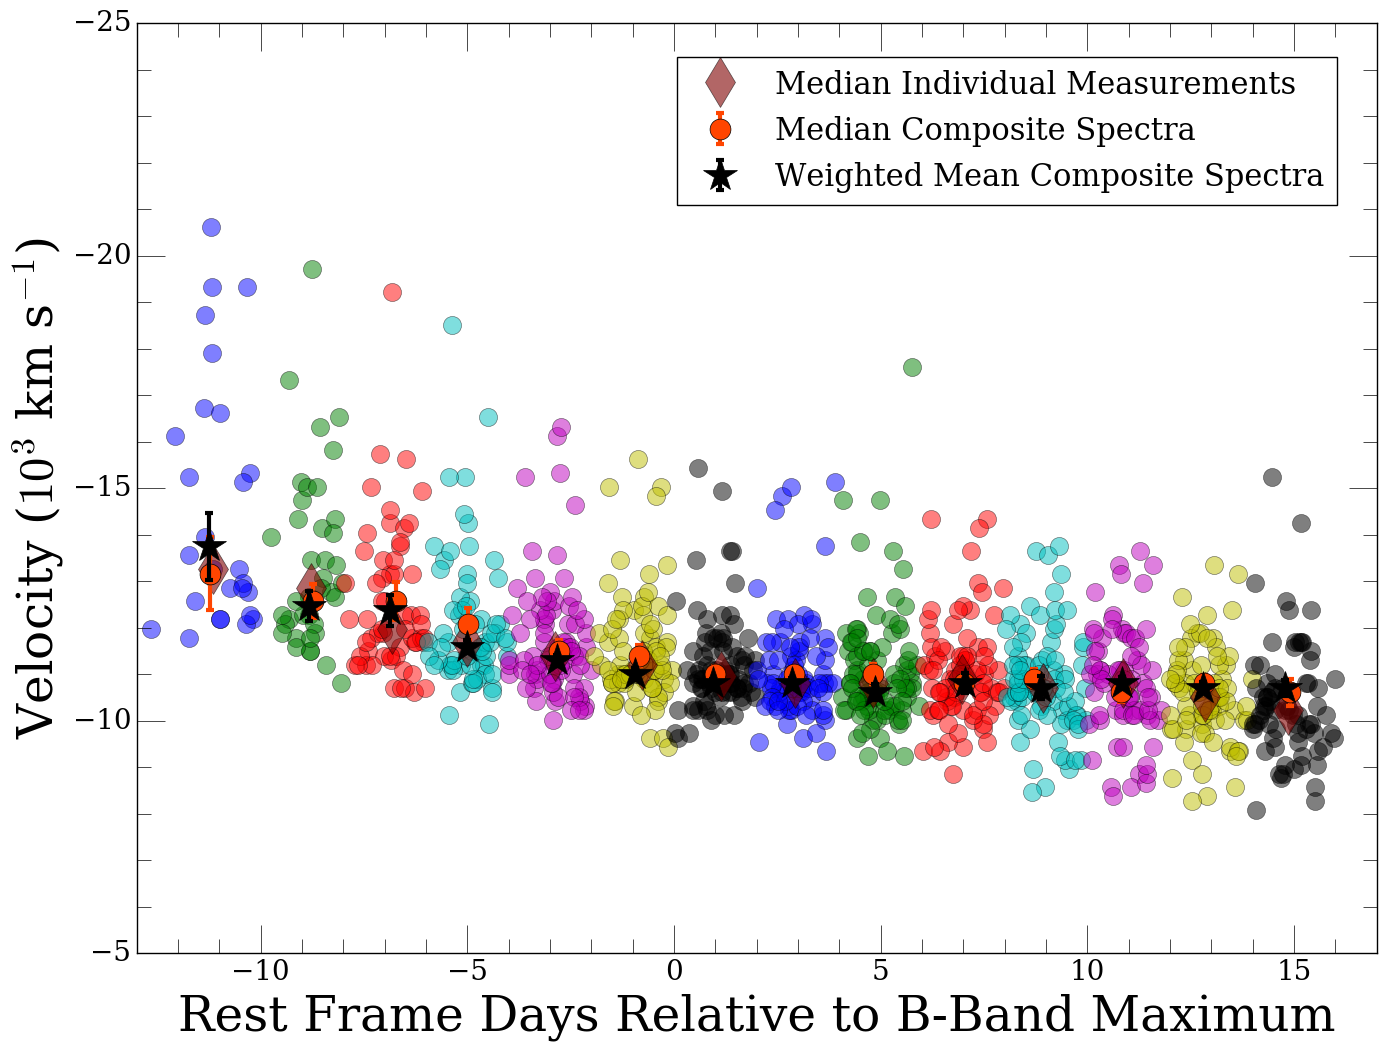

In [37]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Velocity ($10^3$ km s$^{-1}$)', fontsize = 35)
plt.xlabel('Rest Frame Days Relative to B-Band Maximum', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
vel_bin_medians = []
phase_bin_medians = []
for i in range(len(all_phases)):
    phase_bin_medians.append(np.nanmedian(all_phases[i]))
    vel_bin_medians.append(np.nanmedian(all_vels[i])/-1000.)
    plt.plot(all_phases[i], np.asarray(all_vels[i])/-1000., 'o', alpha=.5, markersize=13, zorder=-1)
plt.plot(phase_bin_medians, vel_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', 
         label='Median Individual Measurements', zorder = -.9)
plt.errorbar(phases_med, -1.*np.asarray(velocities_med), yerr=errors_med, color = 'orangered',fmt='o', 
             markersize=15, elinewidth=3, capthick=3,  label='Median Composite Spectra', zorder = -.8)
plt.errorbar(phases, -1.*np.asarray(velocities), yerr=errors, fmt='k*', markersize=25, elinewidth=3, 
             capthick=3, label='Weighted Mean Composite Spectra', zorder = -.7)
# plt.savefig('../../../Paper_Drafts/main_composites/velocity.pdf', dpi = 300, bbox_inches = 'tight')
plt.xlim([-13,17])
plt.ylim([-25,-5])
plt.gca().invert_yaxis()
# plt.legend(loc=1, fontsize = 20, numpoints=1)
plt.legend( loc=1, bbox_to_anchor=(0.5, 0.5, 0.48, 0.48), fontsize=22, numpoints=1)
# plt.ylim([8,22])
plt.savefig('../../../Paper_Drafts/main_composites_updated/velocity_2_day_cut.pdf', dpi = 300, bbox_inches = 'tight')
plt.savefig('../../../Paper_Drafts/plot_images/velocity_2_day_cut.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/velocity_2_day_cut.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [41]:
import numpy as np

0.215564356628
0.133359811015


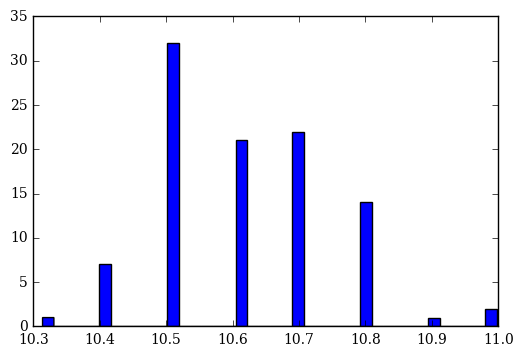

In [42]:
print np.nanstd(boot_velocities_med[4])
new_vs = []
for v in boot_velocities[8]:
    if ~np.isnan(v) and v < 16:
        new_vs.append(v)
print np.nanstd(new_vs)
# plt.hist(np.asarray(boot_velocities[8])[~np.isnan(np.asarray(boot_velocities[8]))], bins=40)
plt.hist(new_vs, bins=40)
plt.show()

In [24]:
check_SN_vels = []
j = 0
for i in range(len(all_vels)):
    for k in range(len(all_vels[i])):
        v = all_vels[i][k]
        SN = sn_arrays[i][k]
#         if v/1000. > 17:
        if SN.phase < 6 and v < 9000:
            print j, SN.name, SN.filename, SN.phase, SN.redshift, SN.velocity, v/1000.
            check_SN_vels.append(SN)
            j+=1

0 1995bd_combined None -9.03504590922 0.0146 -99.0 7.40114355379
1 1991t_combined None -9.21932582951 0.005791 -9.62359 2.70098746925
2 1997br_combined None -6.92887892598 0.005961 -11.5998 2.98670472716
3 1995ac_combined None -5.66132705119 0.050055 None 6.05097447411
4 2002hu_combined None -5.76531935835 0.03 -9.87507 8.27217709296
5 2005m_combined None 0.64653034079 0.0236865440633 -8.09394 7.98156591068
6 2008r_combined None 2.75332787871 0.0135 -10.2992 7.11133246088
7 2005m_combined None 4.72812700526 0.024195701758 -8.09394 7.78797326174


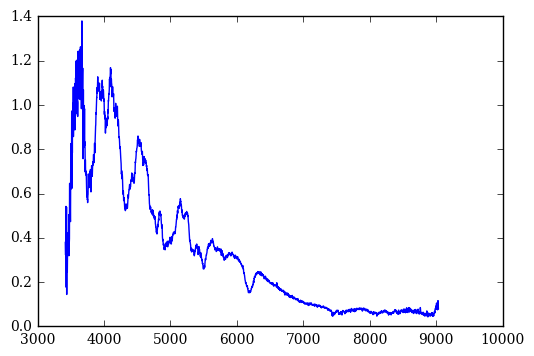

In [32]:
plt.plot(check_SN_vels[7].wavelength, check_SN_vels[7].flux)
plt.show()

In [ ]:
SN = check_SN_vels[13]
sa.measure_velocity(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], 5900., 6300.)

## Zoom In Plots

In [26]:
import matplotlib.gridspec as gridspec

In [27]:
def zoom_in_plot(lst):
    plt.rc('font', family='serif')
    fig, ax = plt.subplots(1,1)
    
#     ax.get_yaxis().set_ticks([])
#     plt.ylim([-311,12])
    plt.ylabel('Relative Flux + Const.', fontsize = 20)
    plt.xlabel('Rest Wavelength ' + "($\mathrm{\AA}$)", fontsize = 20)
    fig.set_size_inches(8.5, 11, forward = True)
    plt.gca().axes.yaxis.set_ticklabels([])
    
    
    ca_si_range = [3400., 4400.]
    si_range = [5500., 6500.]
    nir_trip_range = [7500., 9000]
    
    gs = gridspec.GridSpec(1, 3)
    fig.text(0.45, 0.08, 'Rest Wavelength ' + "($\mathrm{\AA}$)", ha='center', fontsize=15)
#     s_m = query_db.make_colorbar(lst)
    
    params = []
    for comp in lst:
        params.append(np.average(comp.phase_array[comp.x1:comp.x2]))

    norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    # c_m = matplotlib.cm.viridis
    c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])
    
    i = 0
    for comp in lst:
        buff=i
        phase = np.average(comp.phase_array[comp.x1:comp.x2])
        
        ca_si_inds = np.where((comp.wavelength >= ca_si_range[0]) & (comp.wavelength <= ca_si_range[1]))
        si_inds = np.where((comp.wavelength >= si_range[0]) & (comp.wavelength <= si_range[1]))
        nir_trip_inds = np.where((comp.wavelength >= nir_trip_range[0]) & (comp.wavelength <= nir_trip_range[1]))

        ca_si = plt.subplot(gs[0])
        ca_si.axes.set_title("Ca/Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         ca_si.axes.xaxis.set_ticks(np.arange(ca_si_range[0], ca_si_range[1], 1000))
        plt.plot(comp.wavelength[ca_si_inds], 2.*comp.flux[ca_si_inds]- i, 'b-', linewidth = 4, color = s_m.to_rgba(phase))
        plt.ylabel('Relative Flux + Constant', fontsize = 15)
        
        si = plt.subplot(gs[1])
        si.axes.set_title("Si", fontsize = 15)
        plt.xticks(rotation=0, fontsize = 10)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         si.axes.xaxis.set_ticks(np.arange(si_range[0], si_range[1], 1000))
        plt.plot(comp.wavelength[si_inds], 5.*comp.flux[si_inds] - i, 'g-', linewidth = 4, color = s_m.to_rgba(phase))
        
        nir_trip = plt.subplot(gs[2])
        nir_trip.axes.set_title("Ca NIR Triplet", fontsize = 15)
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.xticks(rotation=0, fontsize = 10)
        plt.minorticks_on()
        plt.yticks(fontsize = 20)
        plt.tick_params(
            which='major', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=10)
        plt.tick_params(
            which='minor', 
            bottom='on', 
            top='on',
            left='on',
            right='on',
            length=5)
#         nir_trip.axes.xaxis.set_ticks(np.arange(nir_trip_range[0], nir_trip_range[1], 1000))
        plt.plot(comp.wavelength[nir_trip_inds], 10.*comp.flux[nir_trip_inds] - i, 'r-', linewidth = 4, color = s_m.to_rgba(phase))
        
        i+=1
        
    cb = plt.colorbar(s_m, ax = fig.axes, aspect=50)
    cb.set_label('Phase (days)', fontsize = 15)
    cb.ax.tick_params(labelsize=10)
    cb.ax.invert_yaxis()
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    ca_si.axes.xaxis.set_major_locator(majorLocator)
    ca_si.axes.xaxis.set_major_formatter(majorFormatter)
    ca_si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(300)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    si.axes.xaxis.set_major_locator(majorLocator)
    si.axes.xaxis.set_major_formatter(majorFormatter)
    si.axes.xaxis.set_minor_locator(minorLocator)
    
    majorLocator = MultipleLocator(400)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(100)
    nir_trip.axes.xaxis.set_major_locator(majorLocator)
    nir_trip.axes.xaxis.set_major_formatter(majorFormatter)
    nir_trip.axes.xaxis.set_minor_locator(minorLocator)
        
    
#     ca_si.axes.set_xlim([])
    si.axes.set_xlim([5500.,6500.])
    nir_trip.axes.set_xlim([7500.,8900.])
    ca_si.axes.set_ylim([len(composites)*-1. + 1., 2.3])
    si.axes.set_ylim([len(composites)*-1. + 1.4, 2.25])
    nir_trip.axes.set_ylim([len(composites)*-1 +1.1 , 2.])
    plt.savefig('../../../Paper_Drafts/main_composites_updated/zoom_in.pdf', dpi = 300, bbox_inches = 'tight')
    plt.savefig('../../../Paper_Drafts/plot_images/zoom_in.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

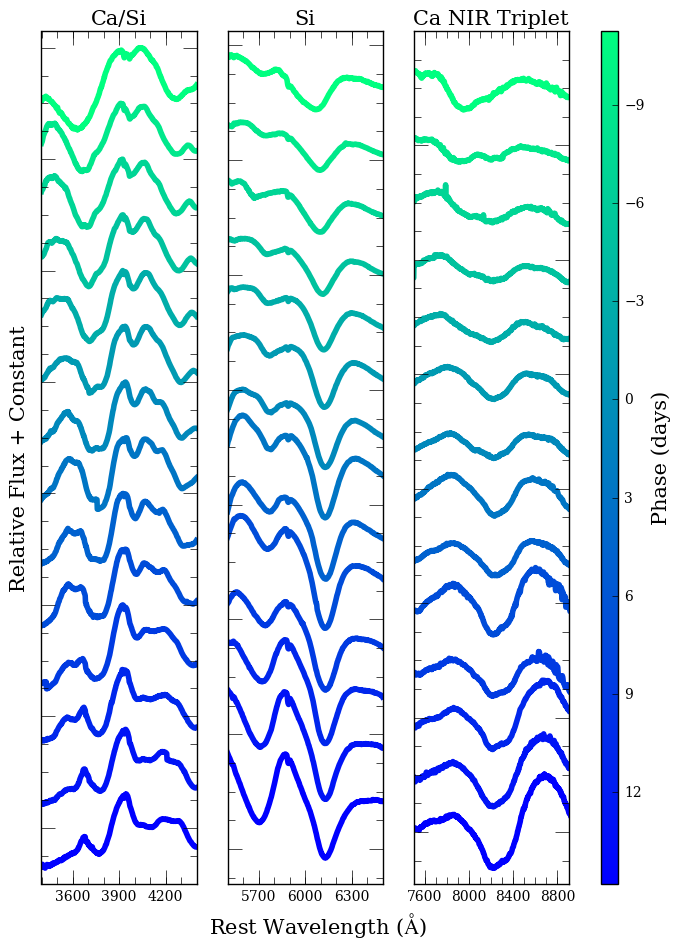

In [28]:
zoom_list = composites[0:26]
zoom_in_plot(zoom_list)

In [29]:
query_db.save_comps_to_files(composites, 'siebert_phase_binned_2day')

-11.21 1.03 0.01
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=35_Nspec=83_phase=m11.21_dm15=1.03_z=0.01.txt
-8.86 1.04 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=53_Nspec=98_phase=m8.86_dm15=1.04_z=0.012.txt
-6.9 1.11 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=70_Nspec=115_phase=m6.9_dm15=1.11_z=0.012.txt
-5.04 1.14 0.014
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=79_Nspec=138_phase=m5.04_dm15=1.14_z=0.014.txt
-2.9 1.17 0.013
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=94_Nspec=140_phase=m2.9_dm15=1.17_z=0.013.txt
-0.94 1.18 0.012
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=95_Nspec=145_phase=m0.94_dm15=1.18_z=0.012.txt
0.95 1.15 0.014
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=99_Nspec=153_phase=p0.95_dm15=1.15_z=0.014.txt
2.92 1.21 0.013
../data/S19_Composite_Spectra/siebert_phase_binned_2day_N=90_Nspec=158_phase=p2.92_dm15=1.21_z=0.013.txt
4.88 1.14 0.014
../data/S19_Comp

In [60]:
import dill

In [61]:
dill.dump_session('../../../Notebook_Backups/temporal_plots.db')

PicklingError: Can't pickle <class 'composite.supernova'>: it's not the same object as composite.supernova